In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_excel('titanic3.xls')

In [3]:
data.shape
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
data = data.filter(['pclass', 'survived', 'age', 'sex'])

In [6]:
data

,pclass,survived,age,sex
0,1,1,29.0000,female
1,1,1,0.9167,male
2,1,0,2.0000,female
3,1,0,30.0000,male
4,1,0,25.0000,female
...,...,...,...,...
1304,3,0,14.5000,female
1305,3,0,NaN,female
1306,3,0,26.5000,male
1307,3,0,27.0000,male


In [7]:
data = data.dropna(axis=0)

<AxesSubplot:>

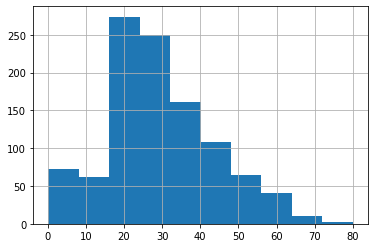

In [8]:
data['age'].hist()

In [9]:
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [10]:
data.value_counts()

pclass  survived  age   sex   
3       0         21.0  male      19
                  22.0  male      16
                  24.0  male      14
                  28.0  male      13
                  26.0  male      12
                                  ..
2       1         13.0  female     1
                  14.0  female     1
                  15.0  female     1
1       0         17.0  male       1
3       1         63.0  female     1
Length: 423, dtype: int64

In [11]:
data['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

In [12]:
#nombre de passagers de chaques classes qui ont moins de 18 ans
data[data['age'] < 18]['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

## Exerxice
Remplacer l'âge par sa catégorie correspondante
Les catégories sont : "moins de 20" , entre 20 et 30, "entre 30 et 40" et + de 40

In [18]:
def get_category(age :int ):
    """
    Return the corresponding category of the person according to her age
    :param age:
    :return:
    """
    if age < 20:
        return 0
    elif age >= 20 and age < 30:
        return 1
    elif age >= 30 and age < 40:
        return 2
    else:
        return 3

data['age'] = data['age'].map(get_category)

/tmp/ipykernel_5043/1148500705.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].map(get_category)


In [20]:
data

,pclass,survived,age,sex
0,1,1,1,female
1,1,1,0,male
2,1,0,0,female
3,1,0,2,male
4,1,0,1,female
...,...,...,...,...
1301,3,0,3,male
1304,3,0,0,female
1306,3,0,1,male
1307,3,0,1,male


In [23]:
data['sex'].astype('category').cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1301    1
1304    0
1306    1
1307    1
1308    1
Length: 1046, dtype: int8